# Pymaceuticals Inc.
---
 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [70]:
# Checking the number of mice.
number_mice = merged_data["Mouse ID"].nunique()

number_mice

249

In [71]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [72]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[~merged_data["Mouse ID"].isin(duplicate_mice)]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [74]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_number = cleaned_data["Mouse ID"].nunique()
cleaned_data_number

248

## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume Std. Error": sem_tumor_volume
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [76]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    variance='var',
    Std_Dev='std',
    SEM='sem'
)
summary_statistics_agg

,Mean,Median,variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

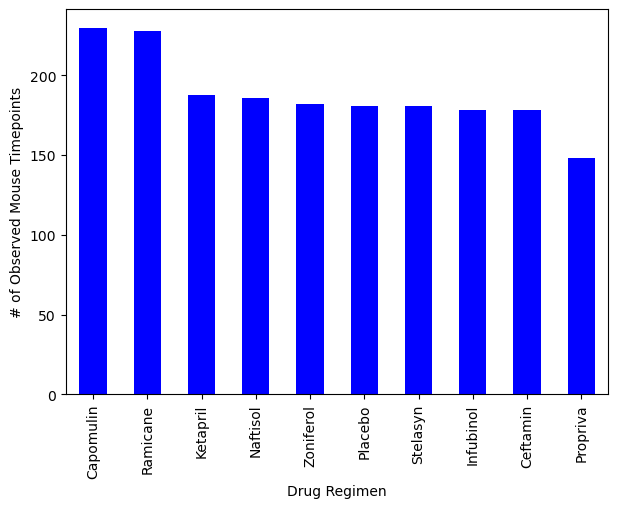

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_per_regimen = cleaned_data["Drug Regimen"].value_counts()
timepoints_per_regimen.plot(kind="bar", color="blue", figsize=(7,5))

#bar plot labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

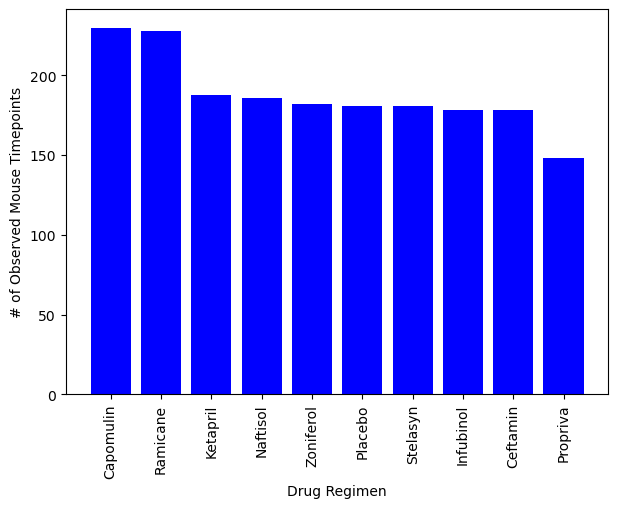

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(7,5))
plt.bar(timepoints_per_regimen.index, timepoints_per_regimen.values, color='blue')

#bar plot labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show

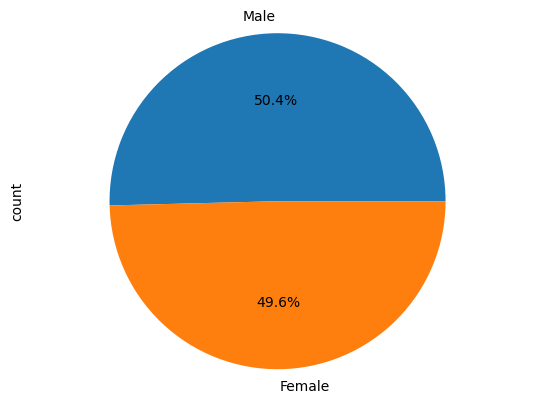

In [79]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_data.drop_duplicates(subset="Mouse ID")
gender_count = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_count.plot(kind="pie", autopct="%1.1f%%", startangle=0, 
colors=["#1f77b4", "#ff7f0e"], labels=["Male", "Female"])

plt.ylabel('count')
plt.axis("equal")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

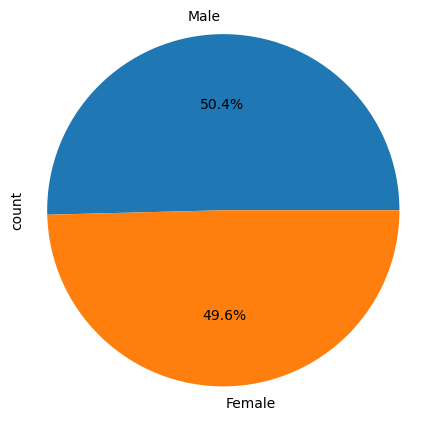

In [80]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_data.drop_duplicates(subset="Mouse ID")
gender_count = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%", startangle=0, 
colors=["#1f77b4", "#ff7f0e"])
plt.ylabel('count')
plt.axis("equal")
plt.show

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")
merged_last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments_of_interest:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_data = merged_data[merged_data['Drug Regimen'] == treatment]
    final_tumor_vol_by_mouse = final_tumor_data.groupby('Mouse ID').agg({'Timepoint':'max'}).reset_index()
    final_tumor_vol_data = pd.merge(final_tumor_data, final_tumor_vol_by_mouse, on=['Mouse ID', 'Timepoint'])['Tumor Volume (mm3)']
    
    quartiles = final_tumor_vol_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # add subset
   

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol_data[(final_tumor_vol_data < lower_bound) | (final_tumor_vol_data > upper_bound)]
    final_tumor_vol[treatment] = outliers
    
for treatment, outliers in final_tumor_vol.items():
        if outliers.empty:
            print(f"{treatment}'s potential outliers: None")
        else:
            outliers_list = outliers.round(2).tolist()
            print(f"{treatment}'s potential outliers: {outliers_list}")

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: [36.32]
Ceftamin's potential outliers: None


<function matplotlib.pyplot.show(close=None, block=None)>

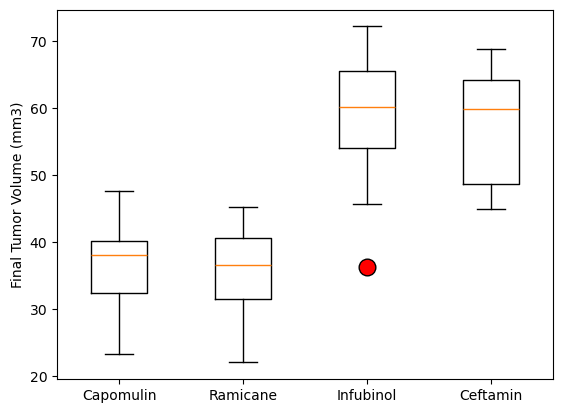

In [83]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol = []

for treatment in treatments_of_interest:
    final_tumor_data = merged_data[merged_data['Drug Regimen'] == treatment]
    final_tumor_vol_by_mouse = final_tumor_data.groupby('Mouse ID').agg({'Timepoint':'max'}).reset_index()
    final_tumor_vol_data = pd.merge(final_tumor_data, final_tumor_vol_by_mouse, on=['Mouse ID', 'Timepoint'])['Tumor Volume (mm3)']
    final_tumor_vol.append(final_tumor_vol_data)

plt.boxplot(final_tumor_vol, labels=treatments_of_interest, flierprops=dict(marker='o', markerfacecolor='r', markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

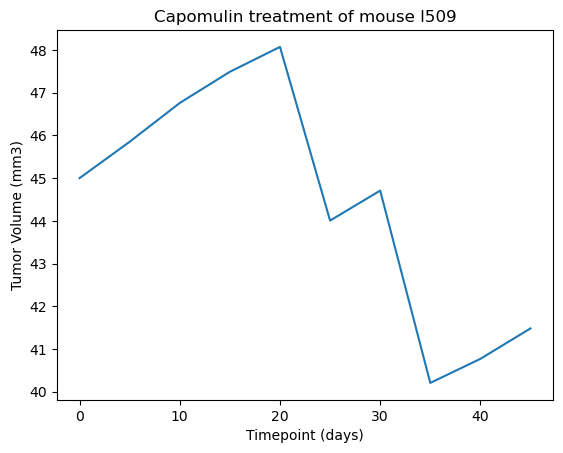

In [84]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter for the Capomulin treatment data
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Filter for a single mouse ID from the Capomulin group
mouse_id = 'l509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

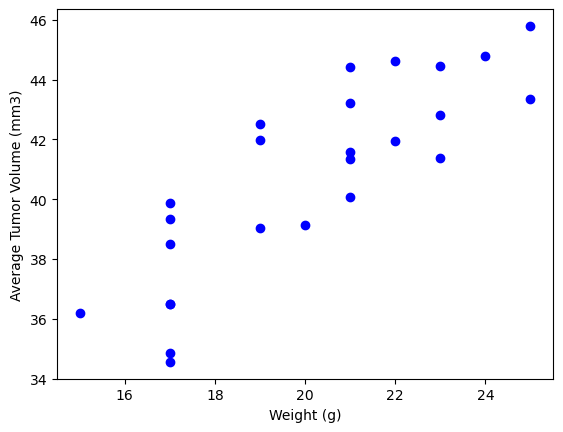

In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter for the Capomulin treatment data
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume per mouse ID for the Capomulin regimen
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight = mouse_metadata[['Mouse ID', 'Weight (g)']]

capomulin_avg_tumor_vol = pd.merge(avg_tumor_vol, mouse_weight, on='Mouse ID')

# Generate scatter plot
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'], capomulin_avg_tumor_vol['Tumor Volume (mm3)'], color='b')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

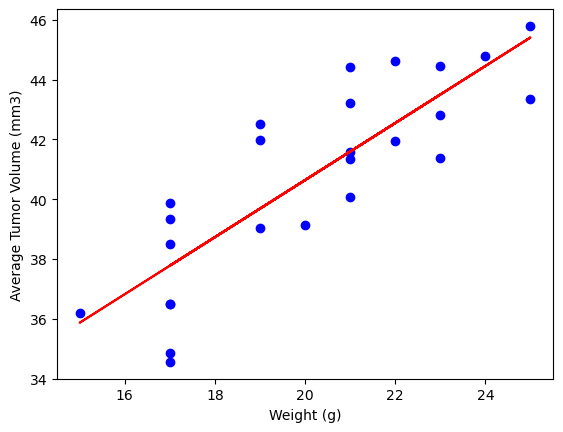

In [86]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = mouse_metadata[['Mouse ID', 'Weight (g)']]
capomulin_avg_tumor_vol = pd.merge(avg_tumor_vol, mouse_weight, on='Mouse ID')

# Correlation coefficient
correlation = np.corrcoef(capomulin_avg_tumor_vol['Weight (g)'],
capomulin_avg_tumor_vol['Tumor Volume (mm3)'])[0, 1]
correlation_rounded = round(correlation, 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_rounded}")

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_tumor_vol['Weight (g)'], 
capomulin_avg_tumor_vol['Tumor Volume (mm3)'])

# Plot the linear regression
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'], capomulin_avg_tumor_vol['Tumor Volume (mm3)'], color='b')
regression_values = capomulin_avg_tumor_vol['Weight (g)'] * slope + intercept
plt.plot(capomulin_avg_tumor_vol['Weight (g)'], regression_values, color='r')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show